In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing

In [2]:
imdb_df=pd.read_csv(r"C:\Users\Subhanghi\Downloads\IMDb Movies India.csv\IMDb Movies India.csv",encoding='latin-1')

In [3]:
imdb_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
imdb_df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [6]:
imdb_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
imdb_df.shape

(15509, 10)

In [8]:
uniq_genre=imdb_df['Genre'].unique()
print(uniq_genre)

['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical'
 'Act

In [9]:
rating=imdb_df['Rating'].value_counts()
print(rating)

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [10]:
imdb_df.drop_duplicates(inplace=True)

In [11]:
imdb_df['Year'] = imdb_df['Year'].str.replace(r'[()]', '', regex=True)
imdb_df['Duration'] = imdb_df['Duration'].str.replace(r' min', '', regex=True)

In [12]:
moviename_rating=imdb_df[['Name','Rating']]

In [13]:
print(moviename_rating.head())

                                 Name  Rating
0                                         NaN
1  #Gadhvi (He thought he was Gandhi)     7.0
2                         #Homecoming     NaN
3                             #Yaaram     4.4
4                   ...And Once Again     NaN


In [14]:
imdb_df['Rating'].max()

10.0

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

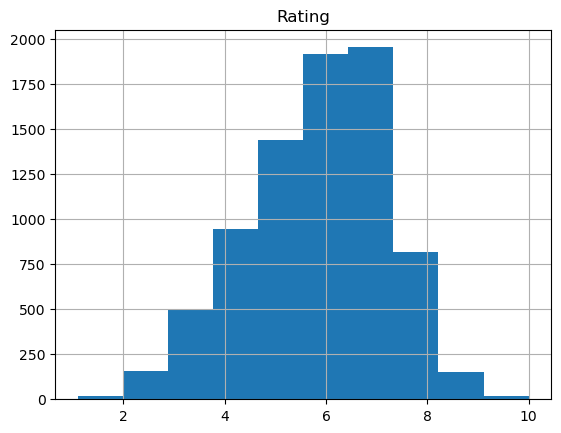

In [15]:
imdb_df.hist(column=['Rating'])

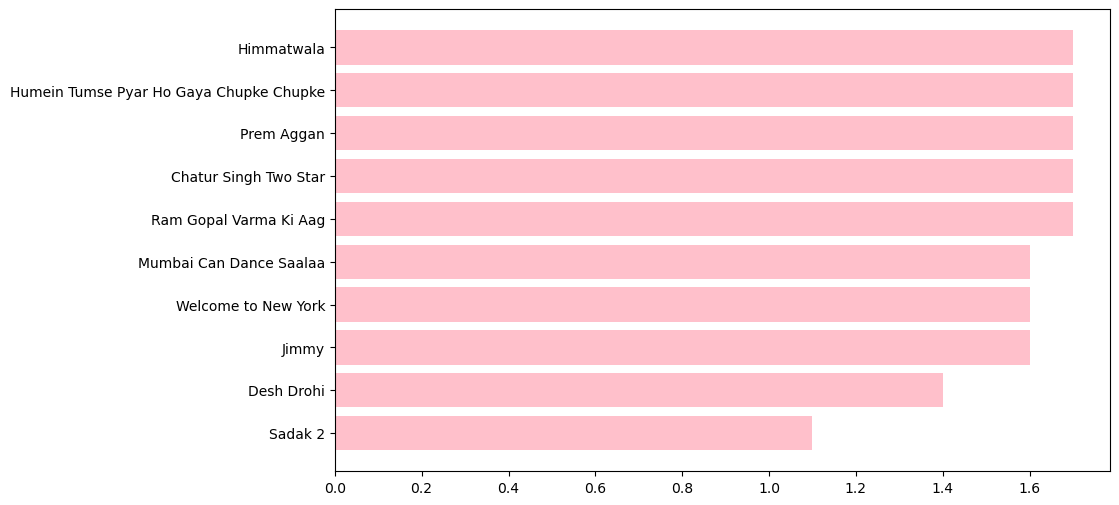

In [16]:
top_movies=imdb_df.sort_values(by='Rating').head(10)
plt.figure(figsize=(10,6))
plt.barh(top_movies['Name'],top_movies['Rating'],color='pink')
plt.show()

In [17]:
imdb_df['Votes']=pd.to_numeric(imdb_df['Votes'],errors='coerce')

In [18]:
dummies = imdb_df['Genre'].str.get_dummies(', ')
df_genre = pd.concat([imdb_df, dummies], axis=1)

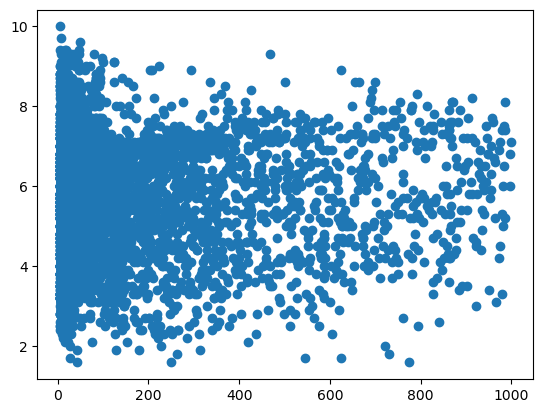

In [19]:
plt.scatter(imdb_df["Votes"],imdb_df["Rating"])
plt.show()

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_14692\3308960252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=imdb_df.Votes, hist=False)


<Axes: xlabel='Votes', ylabel='Density'>

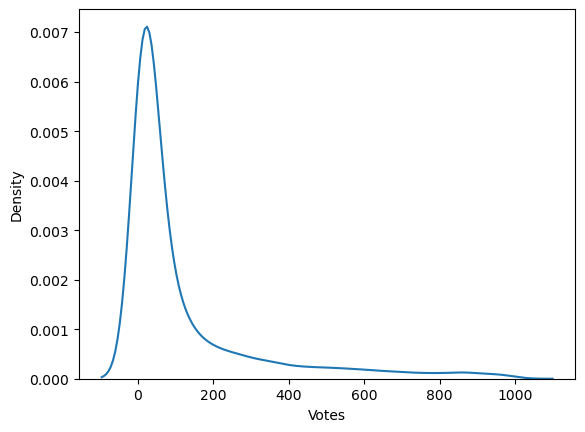

In [20]:
sns.distplot(a=imdb_df.Votes, hist=False)

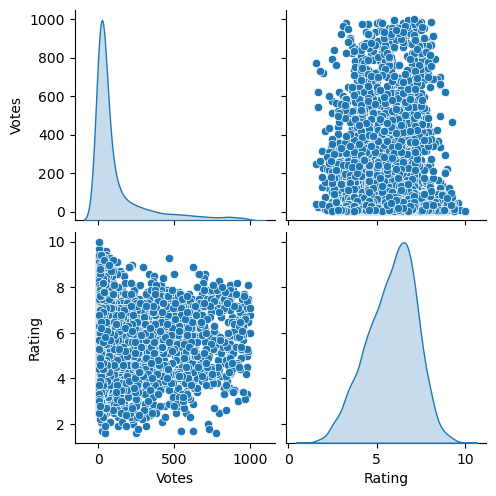

In [21]:
cols=['Votes','Rating','Duration','Year']
sns.pairplot(imdb_df[cols],diag_kind='kde',)

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_14692\262868296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(imdb_df.corr(),cmap='YlGnBu')


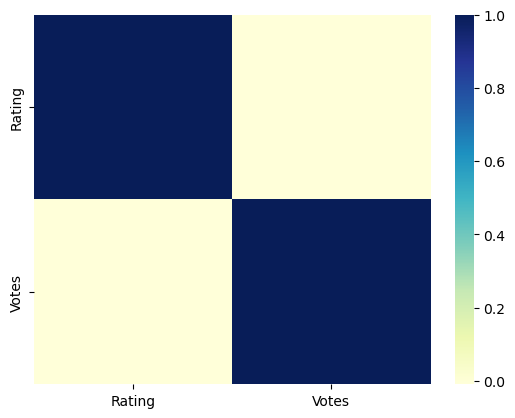

In [22]:
sns.heatmap(imdb_df.corr(),cmap='YlGnBu')
plt.show()

In [23]:
imdb_df.dropna(subset=['Votes'], inplace=True)
imdb_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [24]:
imdb_df['Year']=imdb_df['Year'].astype(str)
imdb_df['Duration']=imdb_df['Duration'].astype(str)
imdb_df['Year']=imdb_df['Year'].str.extract('(\d+)').astype(float)
imdb_df['Duration']=imdb_df['Duration'].str.extract('(\d+)').astype(float)

In [27]:
listOfRate=[]
listOfRate=imdb_df['Rating'].values.tolist()
listOfRate

[7.0,
 4.4,
 4.7,
 5.6,
 4.0,
 6.2,
 5.9,
 6.5,
 5.7,
 6.3,
 7.2,
 4.4,
 6.6,
 5.6,
 3.5,
 5.0,
 4.5,
 4.0,
 5.5,
 7.3,
 5.6,
 6.8,
 5.0,
 3.5,
 6.1,
 6.1,
 7.7,
 6.1,
 5.1,
 7.6,
 6.6,
 3.1,
 6.9,
 5.0,
 3.3,
 6.9,
 5.2,
 6.9,
 4.3,
 5.0,
 4.8,
 5.8,
 4.6,
 7.5,
 6.7,
 5.7,
 5.6,
 5.6,
 6.3,
 4.8,
 3.9,
 7.8,
 5.7,
 6.5,
 6.5,
 4.6,
 5.4,
 4.2,
 6.2,
 5.3,
 5.0,
 3.4,
 5.7,
 6.2,
 4.1,
 5.3,
 5.3,
 6.6,
 4.7,
 5.3,
 4.8,
 8.1,
 6.3,
 7.7,
 6.8,
 4.5,
 6.3,
 8.0,
 7.3,
 6.4,
 6.0,
 6.8,
 3.1,
 3.8,
 3.8,
 6.9,
 7.9,
 6.9,
 8.0,
 5.0,
 7.2,
 4.4,
 2.7,
 6.8,
 4.9,
 2.4,
 5.5,
 5.2,
 5.0,
 5.2,
 5.5,
 7.4,
 5.5,
 5.1,
 7.6,
 6.4,
 5.4,
 6.2,
 6.7,
 6.8,
 6.5,
 6.7,
 6.2,
 5.0,
 7.6,
 5.4,
 4.2,
 5.3,
 7.4,
 6.2,
 4.6,
 3.1,
 4.1,
 3.7,
 4.1,
 5.3,
 4.2,
 4.8,
 4.8,
 3.4,
 5.7,
 5.0,
 3.6,
 6.0,
 4.8,
 3.1,
 5.0,
 4.2,
 4.8,
 7.2,
 6.4,
 6.0,
 6.0,
 6.8,
 3.2,
 5.5,
 4.1,
 5.6,
 6.0,
 3.1,
 4.7,
 5.1,
 5.6,
 5.3,
 4.7,
 6.0,
 5.7,
 3.5,
 5.8,
 4.3,
 3.1,
 4.5,
 5.8,
 5.0,
 3.3,
 5.3,
 5.6

In [30]:
listOfGenre=imdb_df["Genre"].unique()

In [32]:
listOfRate=[]
listOfRate=imdb_df['Rating'].values.tolist()
listOfRate

[7.0,
 4.4,
 4.7,
 5.6,
 4.0,
 6.2,
 5.9,
 6.5,
 5.7,
 6.3,
 7.2,
 4.4,
 6.6,
 5.6,
 3.5,
 5.0,
 4.5,
 4.0,
 5.5,
 7.3,
 5.6,
 6.8,
 5.0,
 3.5,
 6.1,
 6.1,
 7.7,
 6.1,
 5.1,
 7.6,
 6.6,
 3.1,
 6.9,
 5.0,
 3.3,
 6.9,
 5.2,
 6.9,
 4.3,
 5.0,
 4.8,
 5.8,
 4.6,
 7.5,
 6.7,
 5.7,
 5.6,
 5.6,
 6.3,
 4.8,
 3.9,
 7.8,
 5.7,
 6.5,
 6.5,
 4.6,
 5.4,
 4.2,
 6.2,
 5.3,
 5.0,
 3.4,
 5.7,
 6.2,
 4.1,
 5.3,
 5.3,
 6.6,
 4.7,
 5.3,
 4.8,
 8.1,
 6.3,
 7.7,
 6.8,
 4.5,
 6.3,
 8.0,
 7.3,
 6.4,
 6.0,
 6.8,
 3.1,
 3.8,
 3.8,
 6.9,
 7.9,
 6.9,
 8.0,
 5.0,
 7.2,
 4.4,
 2.7,
 6.8,
 4.9,
 2.4,
 5.5,
 5.2,
 5.0,
 5.2,
 5.5,
 7.4,
 5.5,
 5.1,
 7.6,
 6.4,
 5.4,
 6.2,
 6.7,
 6.8,
 6.5,
 6.7,
 6.2,
 5.0,
 7.6,
 5.4,
 4.2,
 5.3,
 7.4,
 6.2,
 4.6,
 3.1,
 4.1,
 3.7,
 4.1,
 5.3,
 4.2,
 4.8,
 4.8,
 3.4,
 5.7,
 5.0,
 3.6,
 6.0,
 4.8,
 3.1,
 5.0,
 4.2,
 4.8,
 7.2,
 6.4,
 6.0,
 6.0,
 6.8,
 3.2,
 5.5,
 4.1,
 5.6,
 6.0,
 3.1,
 4.7,
 5.1,
 5.6,
 5.3,
 4.7,
 6.0,
 5.7,
 3.5,
 5.8,
 4.3,
 3.1,
 4.5,
 5.8,
 5.0,
 3.3,
 5.3,
 5.6

In [37]:
imdb_df['Year'].unique()

array([2019., 1997., 2012., 2014., 2004., 2016., 1991., 2010., 1958.,
       2021., 2017., 1993., 1946., 2013., 2003., 1998., 2018., 1979.,
       2002., 1951., 1956., 2008., 1974., 2009., 2015., 1981., 2020.,
       1985., 2007., 2011., 1967., 2005., 1988., 1995., 2006., 1987.,
       1996., 1973., 1994., 1999., 1968., 1943., 1953., 1986., 1982.,
       1977., 1950., 1969., 1948., 1970., 1990., 1989., 1947., 2001.,
       2000., 1971., 1978., 1944., 1963., 1935., 1992., 1976., 1984.,
       1975., 1980., 1966., 1972., 1960., 1964., 1952., 1959., 1957.,
       1954., 1962., 1961., 1965., 1933., 1955., 1983., 1936., 1940.,
       1932., 1949., 1945., 1938., 1941., 1942., 1937., 1934., 1931.,
       1939., 1917.])

In [38]:
year=imdb_df['Year'].value_counts()
year

2017.0    172
2019.0    171
2018.0    158
2005.0    135
2015.0    135
         ... 
1933.0      5
1934.0      5
1939.0      5
1931.0      3
1917.0      1
Name: Year, Length: 92, dtype: int64

In [39]:
imdb_df['Year']=imdb_df['Year'].astype(int)

In [40]:
imdb_df.dropna(subset=['Actor 1','Actor 2','Actor 3','Duration'], inplace=True)

In [41]:
imdb_df[(imdb_df['Actor 1']==imdb_df['Actor 2']) | (imdb_df['Actor 3']==imdb_df['Actor 2']) | (imdb_df['Actor 3']==imdb_df['Actor 1'])]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
50,2 Nights in Soul Valley,2012,80.0,"Adventure, Horror, Mystery",6.8,21.0,Harish Sharma,Hemant Pandey,Sumeet Sharma,Sumeet Sharma
488,Aashmani Jawaharat,2014,132.0,Drama,6.1,10.0,Sriparna Dey,Anamitra Roy,Anamitra Roy,Yovik
920,Amavas,2019,134.0,"Horror, Thriller",2.8,308.0,Bhushan Patel,Ali Asgar,Ali Asgar,Vivan Bhatena
1162,Antenna,2021,84.0,Drama,7.1,7.0,Shoib Nikash Shah,Imran Khan,Imran Khan,Azmat Khwaja
3589,Delhi 47 KM,2018,98.0,Drama,5.9,24.0,Shadab Khan,Shadab Khan,Shadab Khan,Shadab Khan
3841,Dil Diya Dard Liya,1966,169.0,"Drama, Musical, Romance",6.4,119.0,Abdul Rashid Kardar,Dilip Kumar,Dilip Kumar,Waheeda Rehman
4324,Eight Days,1946,141.0,"Comedy, Drama",6.5,8.0,D.N. Pai,Ashok Kumar,Ashok Kumar,Veera
4572,Evadithe Nakenti,2007,170.0,"Action, Crime, Drama",6.2,58.0,Jeevitha,Rajasekhar,Samudra V.,Rajasekhar
5200,GRADE,2017,64.0,Drama,6.1,27.0,Anup Samaddar,Mrinalini Chatterjee,Swati Ghosh,Mrinalini Chatterjee
11708,Ramshastri,1944,122.0,Drama,6.8,10.0,Vishram Bedekar,Gajanan Jagirdar,Raja Nene,Gajanan Jagirdar


In [65]:
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
actor_df = pd.melt(imdb_df[['Year'] + actor_cols], id_vars=['Year'], value_vars=actor_cols, var_name='Actor', value_name='Movie_Count')
actor_df.dropna(subset=['Actor'], inplace=True)

In [45]:
X=imdb_df[['Year','Duration','Votes']]
Y=imdb_df['Rating']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
           

In [46]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train) ## feature scaling
X_test=sc.fit_transform(X_test)

In [52]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [53]:
Y_pred=linear.predict(X_test)
Y_pred

array([6.26727709, 5.98693232, 5.69039314, 5.39390707, 5.79649136,
       5.99587272, 6.12928204, 5.37520856, 5.59300898, 5.54697575,
       5.31317245, 5.78202921, 5.94626612, 5.41601686, 5.39697209,
       5.53041301, 5.54765508, 5.928168  , 5.49500185, 5.77979974,
       5.01466954, 6.13822665, 5.74757463, 5.5603324 , 6.05842181,
       5.12854061, 5.46491671, 6.29436034, 6.19191906, 5.53838418,
       6.11809589, 5.54677157, 5.63581672, 5.65525296, 6.30958286,
       5.52336951, 5.48183512, 5.24704948, 5.90851658, 5.63662021,
       5.86942212, 5.67192929, 5.469263  , 6.17632455, 6.81816127,
       5.56604729, 5.71384461, 5.45714815, 5.53281399, 5.12342663,
       6.21465864, 6.29046973, 5.38488089, 5.63338945, 5.43380974,
       5.29803097, 6.12468424, 5.3142664 , 5.51993405, 6.62252058,
       5.43167764, 6.24772934, 6.62947517, 5.94646871, 5.2598042 ,
       5.44672969, 5.29111638, 5.25390828, 6.18071816, 5.46333869,
       5.90708747, 6.77931411, 5.72693083, 5.71334055, 5.64119

In [54]:
accuracy=r2_score(Y_test,Y_pred)

In [55]:
accuracy

0.10223980732402638

In [47]:
model = Sequential()
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [48]:
optimizer=Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

In [49]:
model.fit(X_train,Y_train,epochs=35)

Epoch 1/35
108/108 [==============================] - 1s 3ms/step - loss: 4.4340 - mse: 4.4340
Epoch 2/35
108/108 [==============================] - 0s 2ms/step - loss: 1.8147 - mse: 1.8147
Epoch 3/35
108/108 [==============================] - 0s 2ms/step - loss: 1.8342 - mse: 1.8342
Epoch 4/35
108/108 [==============================] - 0s 2ms/step - loss: 1.7824 - mse: 1.7824
Epoch 5/35
108/108 [==============================] - 0s 2ms/step - loss: 1.7644 - mse: 1.7644
Epoch 6/35
108/108 [==============================] - 0s 2ms/step - loss: 1.8048 - mse: 1.8048
Epoch 7/35
108/108 [==============================] - 0s 2ms/step - loss: 1.7190 - mse: 1.7190
Epoch 8/35
108/108 [==============================] - 0s 2ms/step - loss: 1.7167 - mse: 1.7167
Epoch 9/35
108/108 [==============================] - 0s 3ms/step - loss: 1.7369 - mse: 1.7369
Epoch 10/35
108/108 [==============================] - 0s 3ms/step - loss: 1.7721 - mse: 1.7721
Epoch 11/35
108/108 [============================

In [50]:
model.evaluate(X_test,Y_test)

27/27 [==============================] - 0s 2ms/step - loss: 1.7874 - mse: 1.7874


[1.7874128818511963, 1.7874128818511963]

In [51]:
y_pred = model.predict(X_test)
print("y predict is: ",y_pred)

27/27 [==============================] - 0s 2ms/step
y predict is:  [[6.323017 ]
 [6.118189 ]
 [5.44127  ]
 [5.3725615]
 [6.035198 ]
 [5.43657  ]
 [6.2707796]
 [5.1677   ]
 [5.235592 ]
 [5.5211296]
 [5.456665 ]
 [5.6968174]
 [6.102935 ]
 [5.3839197]
 [5.389167 ]
 [5.432632 ]
 [5.553526 ]
 [5.985421 ]
 [5.3581204]
 [5.9691677]
 [4.947098 ]
 [6.187785 ]
 [5.6325607]
 [5.245941 ]
 [6.2680845]
 [5.0268908]
 [5.5674906]
 [6.1839466]
 [6.1651163]
 [5.2893276]
 [5.940278 ]
 [5.59418  ]
 [5.746662 ]
 [5.5452576]
 [6.3765554]
 [5.188313 ]
 [5.4829407]
 [5.0790358]
 [5.934951 ]
 [5.400037 ]
 [6.021559 ]
 [5.680086 ]
 [5.3156557]
 [6.360466 ]
 [6.800517 ]
 [5.1919165]
 [5.7836657]
 [5.6879034]
 [5.3480425]
 [5.095205 ]
 [6.250617 ]
 [6.3494253]
 [5.368758 ]
 [5.575122 ]
 [5.126871 ]
 [5.085888 ]
 [6.197894 ]
 [5.1423182]
 [5.340495 ]
 [6.9454784]
 [5.175153 ]
 [6.3548727]
 [6.7737074]
 [5.7420206]
 [5.104685 ]
 [5.202898 ]
 [5.3261375]
 [5.419196 ]
 [6.168379 ]
 [5.159233 ]
 [5.9609966]
 [6.78223